<a href="https://colab.research.google.com/github/Khachapurilover/AI_PSU/blob/main/4/%D0%94%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Raw_Data_for_train_test.csv')

df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
df.isnull().sum()

,0
TARGET_B,0
TARGET_D,14529
CONTROL_NUMBER,0
MONTHS_SINCE_ORIGIN,0
DONOR_AGE,4795
IN_HOUSE,0
URBANICITY,0
SES,0
CLUSTER_CODE,0
HOME_OWNER,0


In [14]:
df.drop(columns = ['TARGET_D', 'CONTROL_NUMBER', 'DONOR_AGE', 'INCOME_GROUP', 'WEALTH_RATING', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_AVG_GIFT_AMT', 'LAST_GIFT_AMT', 'FILE_AVG_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT'], inplace = True)


In [15]:
rows_for_del = []
n = 0
for x in df['MONTHS_SINCE_LAST_PROM_RESP'].isnull():
  if x == True:
    rows_for_del.append(df.index[n])
  n += 1

df.drop(rows_for_del, axis = 0, inplace = True)

In [16]:
rows_for_del = []
n = 0
for x in df['DONOR_GENDER']:
  if x == 'U':
    rows_for_del.append(df.index[n])
  n += 1

df.drop(rows_for_del, axis = 0, inplace = True)

In [17]:
rows_for_del = []
n = 0
for x in df['URBANICITY']:
  if x == '?':
    rows_for_del.append(df.index[n])
  n += 1

df.drop(rows_for_del, axis = 0, inplace = True)

In [18]:
df['SES'] = df['SES'].astype(int)
df['CLUSTER_CODE'] = df['CLUSTER_CODE'].astype(int)


In [21]:
labelencoder = LabelEncoder()
for cols in df.columns:
  if df[cols].dtype == object:
    df[cols] = labelencoder.fit_transform(df[cols].values)

In [22]:
print(df['TARGET_B'].value_counts()[0])
print(df['TARGET_B'].value_counts()[1])

13300
4416


In [23]:
df.shape

(17716, 36)

In [24]:
not_donors = round(df['TARGET_B'].value_counts()[0]/len(df) * 100, 2)
donors = round(df['TARGET_B'].value_counts()[1]/len(df) * 100, 2)

print(f'Не доноры: {not_donors}% данных')
print(f'Доноры: {donors}% данных')

Не доноры: 75.07% данных
Доноры: 24.93% данных


In [25]:
X = df.drop('TARGET_B', axis=1)
y = df['TARGET_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X, columns=X_train.columns, index=X_train.index)
X_train_scaled

ValueError: could not convert string to float: 'C'

In [26]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X, columns=X_train.columns, index=X_train.index)
X_train_scaled

,MONTHS_SINCE_ORIGIN,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,...,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,FILE_CARD_GIFT
18221,0.142857,0.0,0.5,0.0,0.48,0.0,0.0,-1.0,0.666667,0.000000,...,-0.560909,1.0,2.0,-0.50,-0.415730,-0.428571,0.0,-0.5,-0.50,0.2
10506,0.571429,0.0,0.5,0.0,0.48,0.0,1.0,0.0,0.000000,1.666667,...,0.500000,-0.5,0.0,0.50,0.471910,0.000000,0.0,0.5,0.50,0.6
3161,-0.428571,0.0,0.5,0.0,0.44,0.0,0.0,-1.0,0.666667,0.000000,...,0.409091,-0.5,0.0,0.25,-0.539326,1.428571,-2.0,-1.0,0.25,-0.6
18299,-0.142857,0.0,-1.0,-1.0,-0.20,1.0,0.0,0.0,-0.333333,1.666667,...,-0.500000,2.5,4.0,-0.50,-0.258427,0.000000,-2.0,-2.0,-0.50,0.4
6159,0.571429,0.0,0.5,0.0,0.48,0.0,1.0,0.0,-0.333333,2.666667,...,0.136364,0.0,0.0,0.25,1.438202,-0.285714,0.0,1.0,0.00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,-0.428571,0.0,1.0,-1.0,-1.04,1.0,0.0,0.0,0.000000,1.666667,...,-0.500000,0.5,1.0,0.00,-0.595506,0.000000,0.0,0.0,0.00,-0.4
12982,0.142857,0.0,0.5,-1.0,0.28,1.0,1.0,-1.0,0.333333,0.000000,...,-0.473636,4.0,6.0,-0.75,0.561798,-0.285714,0.0,0.5,-0.75,1.8
5941,0.571429,0.0,-0.5,0.0,0.68,0.0,1.0,0.0,-0.333333,1.000000,...,0.318182,-0.5,1.0,0.75,0.528090,0.000000,0.0,0.5,0.75,1.2
1050,0.142857,0.0,0.5,0.0,0.48,0.0,0.0,0.0,-0.333333,0.333333,...,0.136364,-0.5,1.0,0.50,0.044944,-0.714286,0.0,7.5,-3.25,0.4


In [27]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X, columns=X_test.columns, index=X_test.index)
X_test_scaled

,MONTHS_SINCE_ORIGIN,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,...,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,FILE_CARD_GIFT
9097,-0.714286,0.0,0.5,0.0,0.52,1.0,0.0,-1.0,0.666667,0.00,...,0.863636,-1.0,0.0,-0.50,-0.681818,2.142857,-1.0,-0.5,-0.50,-0.500000
5763,0.142857,0.0,-1.0,0.0,0.00,0.0,1.0,0.0,-0.333333,5.00,...,0.620909,0.0,2.0,-0.50,0.329545,0.000000,0.0,2.0,-0.50,0.500000
13901,0.428571,0.0,0.5,0.0,0.36,0.0,1.0,0.0,-0.333333,0.25,...,0.227273,-0.5,0.0,0.25,0.227273,-0.285714,0.0,0.5,-0.25,0.500000
9919,-0.571429,0.0,0.5,-1.0,0.32,0.0,0.0,0.0,-0.333333,1.25,...,0.863636,0.0,0.0,0.00,-0.113636,2.142857,0.0,1.0,0.00,-0.500000
3298,-0.571429,0.0,0.0,-1.0,-0.60,1.0,1.0,-1.0,0.333333,0.00,...,-0.363636,0.5,1.0,-0.50,-0.409091,-0.285714,0.0,0.0,-0.50,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.000000,0.0,-1.0,-1.0,-0.12,1.0,0.0,-1.0,0.333333,0.00,...,0.272727,1.5,1.0,0.00,1.795455,0.000000,0.0,0.5,0.00,0.666667
13764,-0.571429,0.0,-0.5,0.0,0.64,1.0,1.0,-1.0,0.333333,0.00,...,-0.045455,-0.5,0.0,-0.75,-0.625000,0.714286,-4.0,-2.0,-0.75,-0.500000
10228,-0.571429,0.0,0.0,0.0,-0.40,0.0,0.0,0.0,-0.333333,4.00,...,1.318182,-1.0,0.0,1.25,-0.625000,2.857143,-2.0,-1.0,1.25,-0.500000
17439,0.428571,0.0,0.5,0.0,0.44,0.0,0.0,-1.0,0.666667,0.00,...,0.863636,-1.0,0.0,-0.75,0.795455,0.000000,-1.0,0.0,-0.75,0.333333


In [28]:
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(y_train))
print("Тестовый набор:", test_counts_label/ len(y_test))

Распределение классов: 

Обучающий набор: [0.75155236 0.24844764]
Тестовый набор: [0.7474605 0.2525395]


In [29]:
print(df['TARGET_B'].value_counts()[0])
print(df['TARGET_B'].value_counts()[1])

13300
4416


In [30]:
df = df.sample(frac=1)

target_b_yes = df.loc[df['TARGET_B'] == 1]
target_b_no = df.loc[df['TARGET_B'] == 0][:5078]

normal_distributed_df = pd.concat([target_b_yes, target_b_no])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,TARGET_B,MONTHS_SINCE_ORIGIN,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,...,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,FILE_CARD_GIFT
5048,0,29,0,3,2,36,0,1,1,0,...,16.00,1,1,24.0,16.0,16.0,3,8,24,1
4203,0,77,0,4,3,9,0,1,1,0,...,0.00,2,0,15.0,58.0,5.0,5,12,15,1
6397,1,29,0,1,2,44,0,1,0,3,...,11.00,3,1,19.0,38.0,5.0,6,12,19,1
8692,1,17,0,0,2,28,0,0,0,3,...,20.00,1,1,17.0,20.0,20.0,4,10,17,1
7855,0,137,0,2,2,20,0,0,0,0,...,9.75,4,4,21.0,175.0,5.0,5,11,21,17


In [31]:
new_df.shape

(9494, 36)

Распределение классов в подвыборке
TARGET_B
0    0.534864
1    0.465136
Name: count, dtype: float64


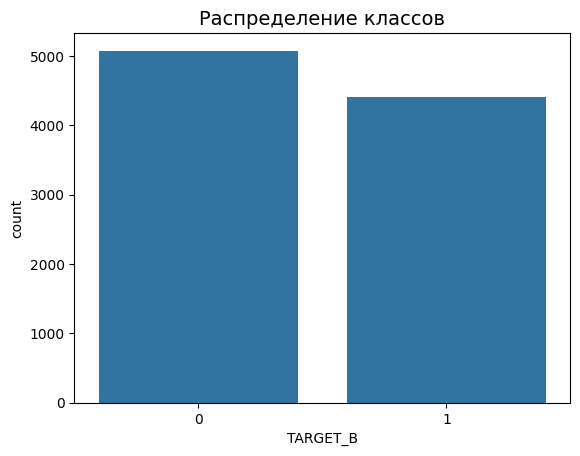

In [32]:
print('Распределение классов в подвыборке')
print(new_df['TARGET_B'].value_counts()/len(new_df))

# проверяем снова распределение целевой переменной
sns.countplot(x='TARGET_B', data = new_df)
plt.title('Распределение классов', fontsize=14)
plt.show()

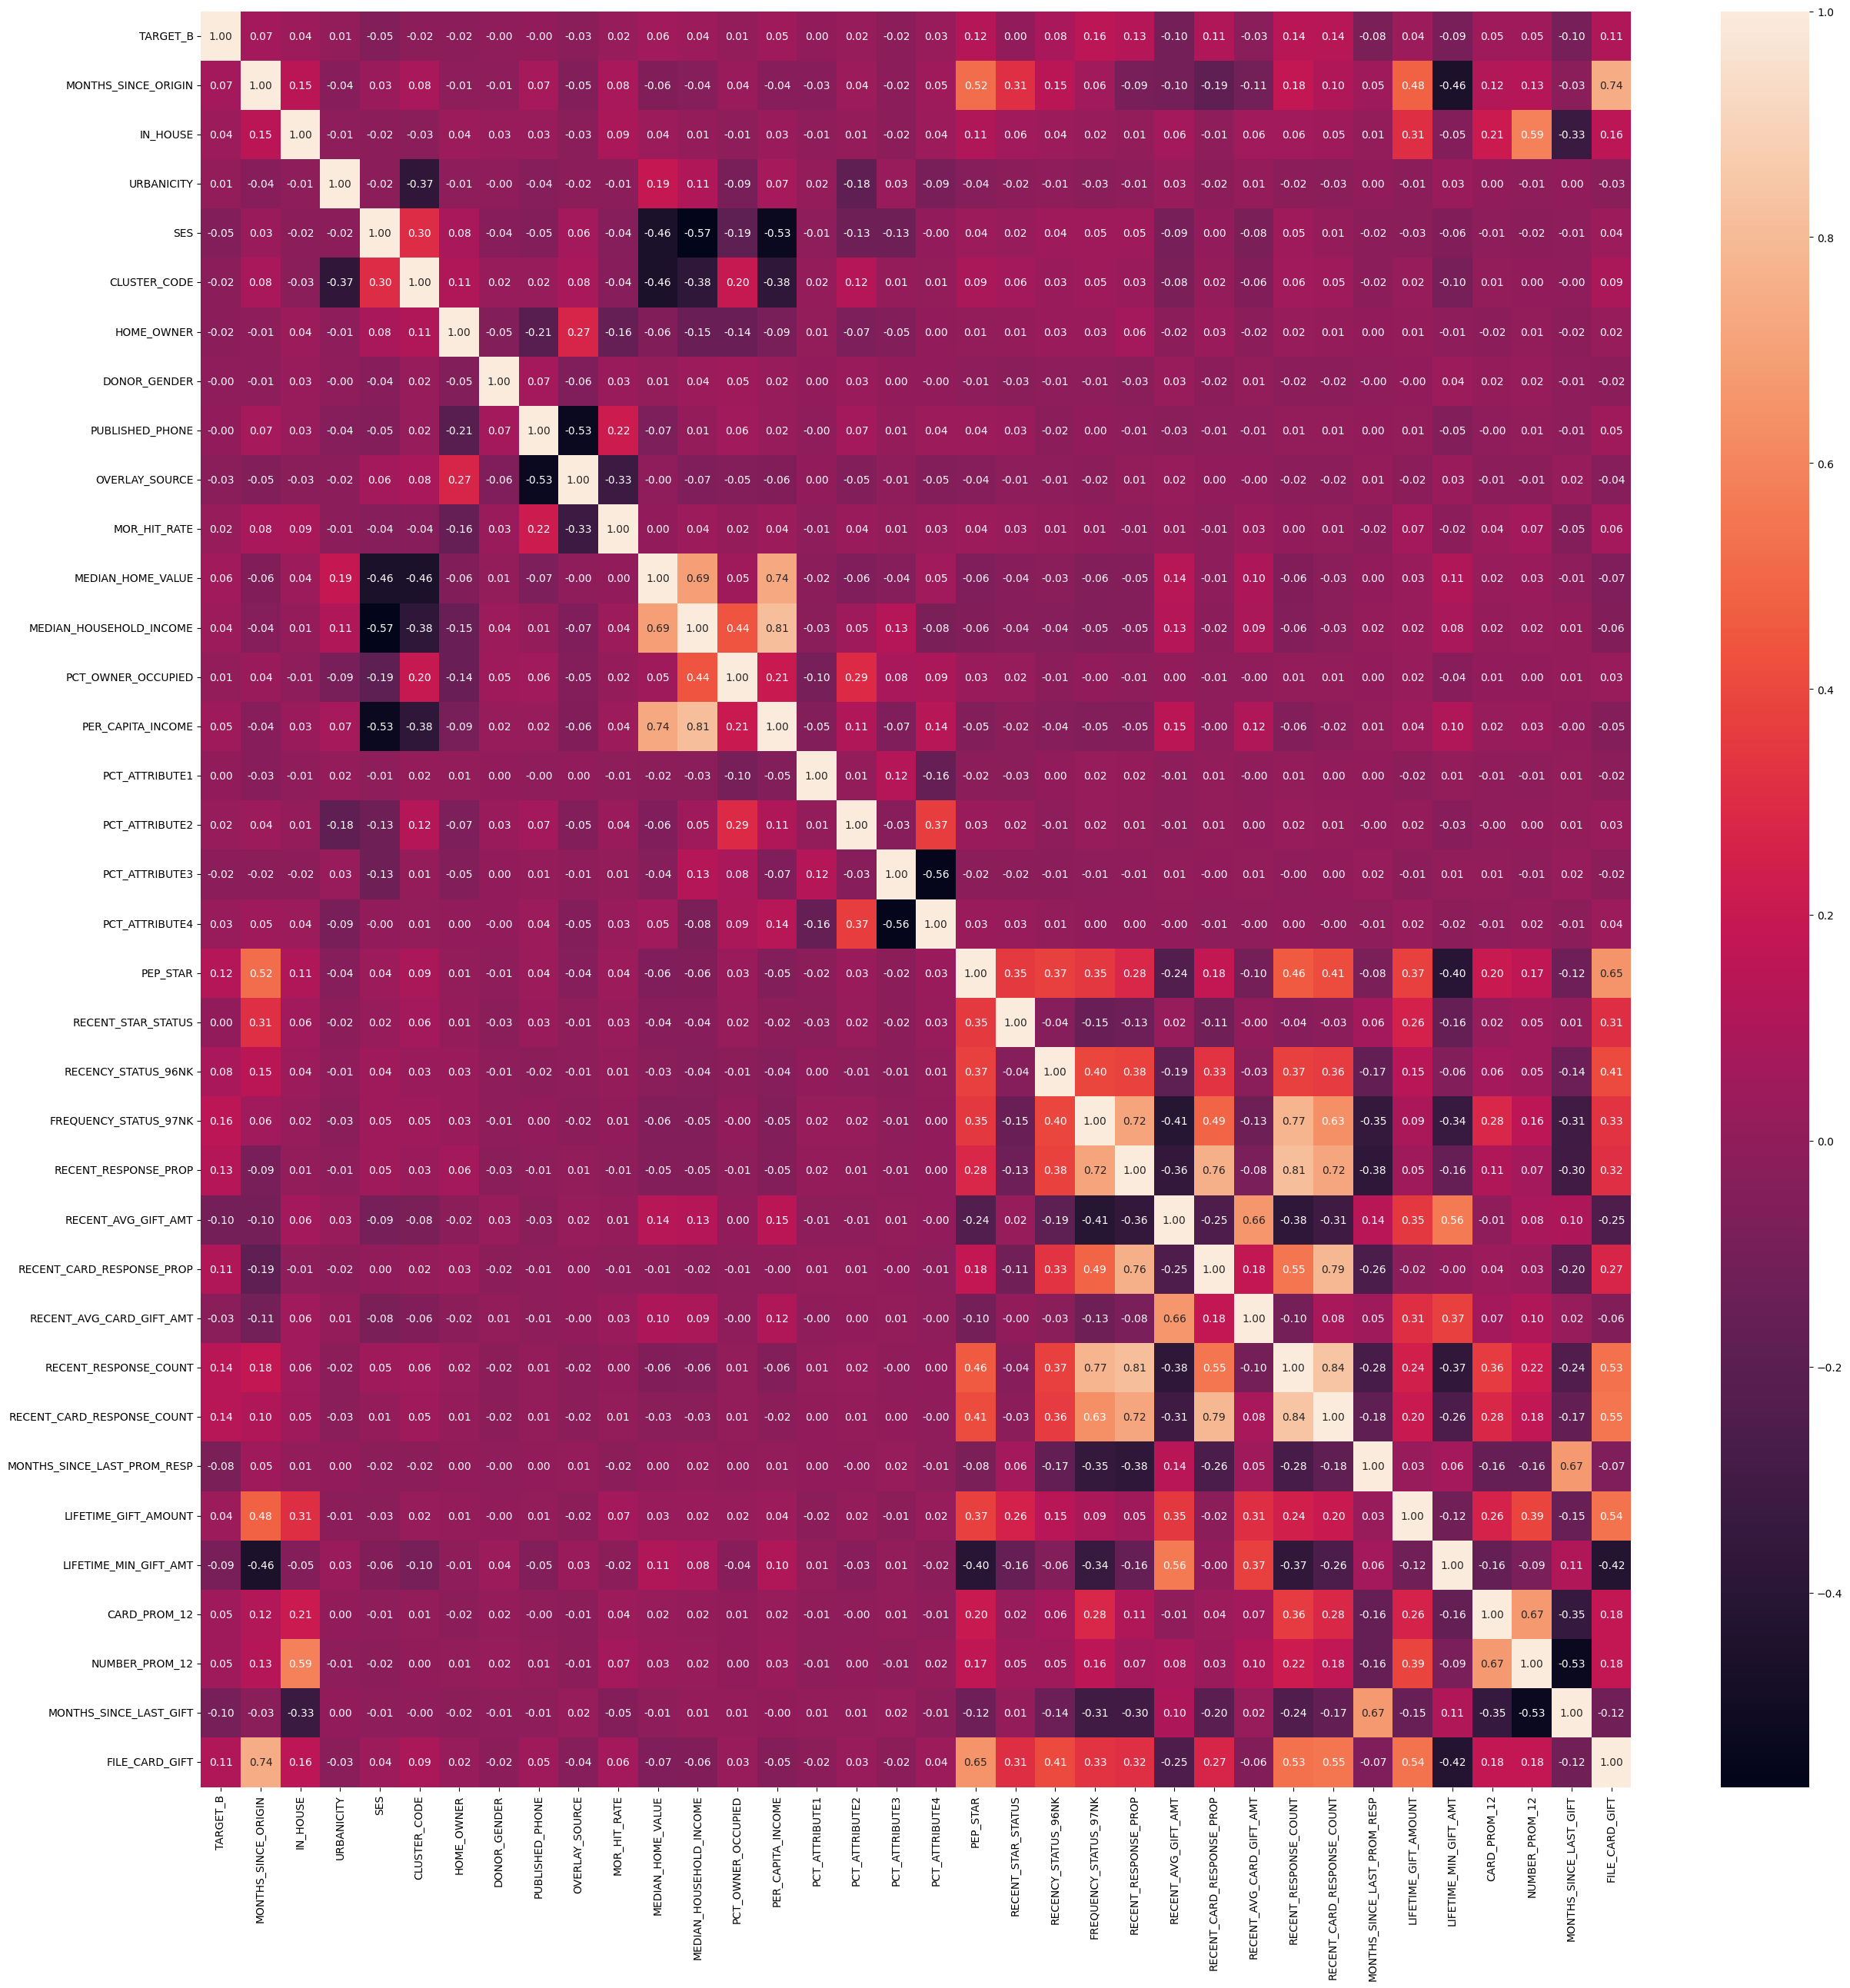

In [33]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_df.corr(), fmt='.2f', annot=True)
plt.show()

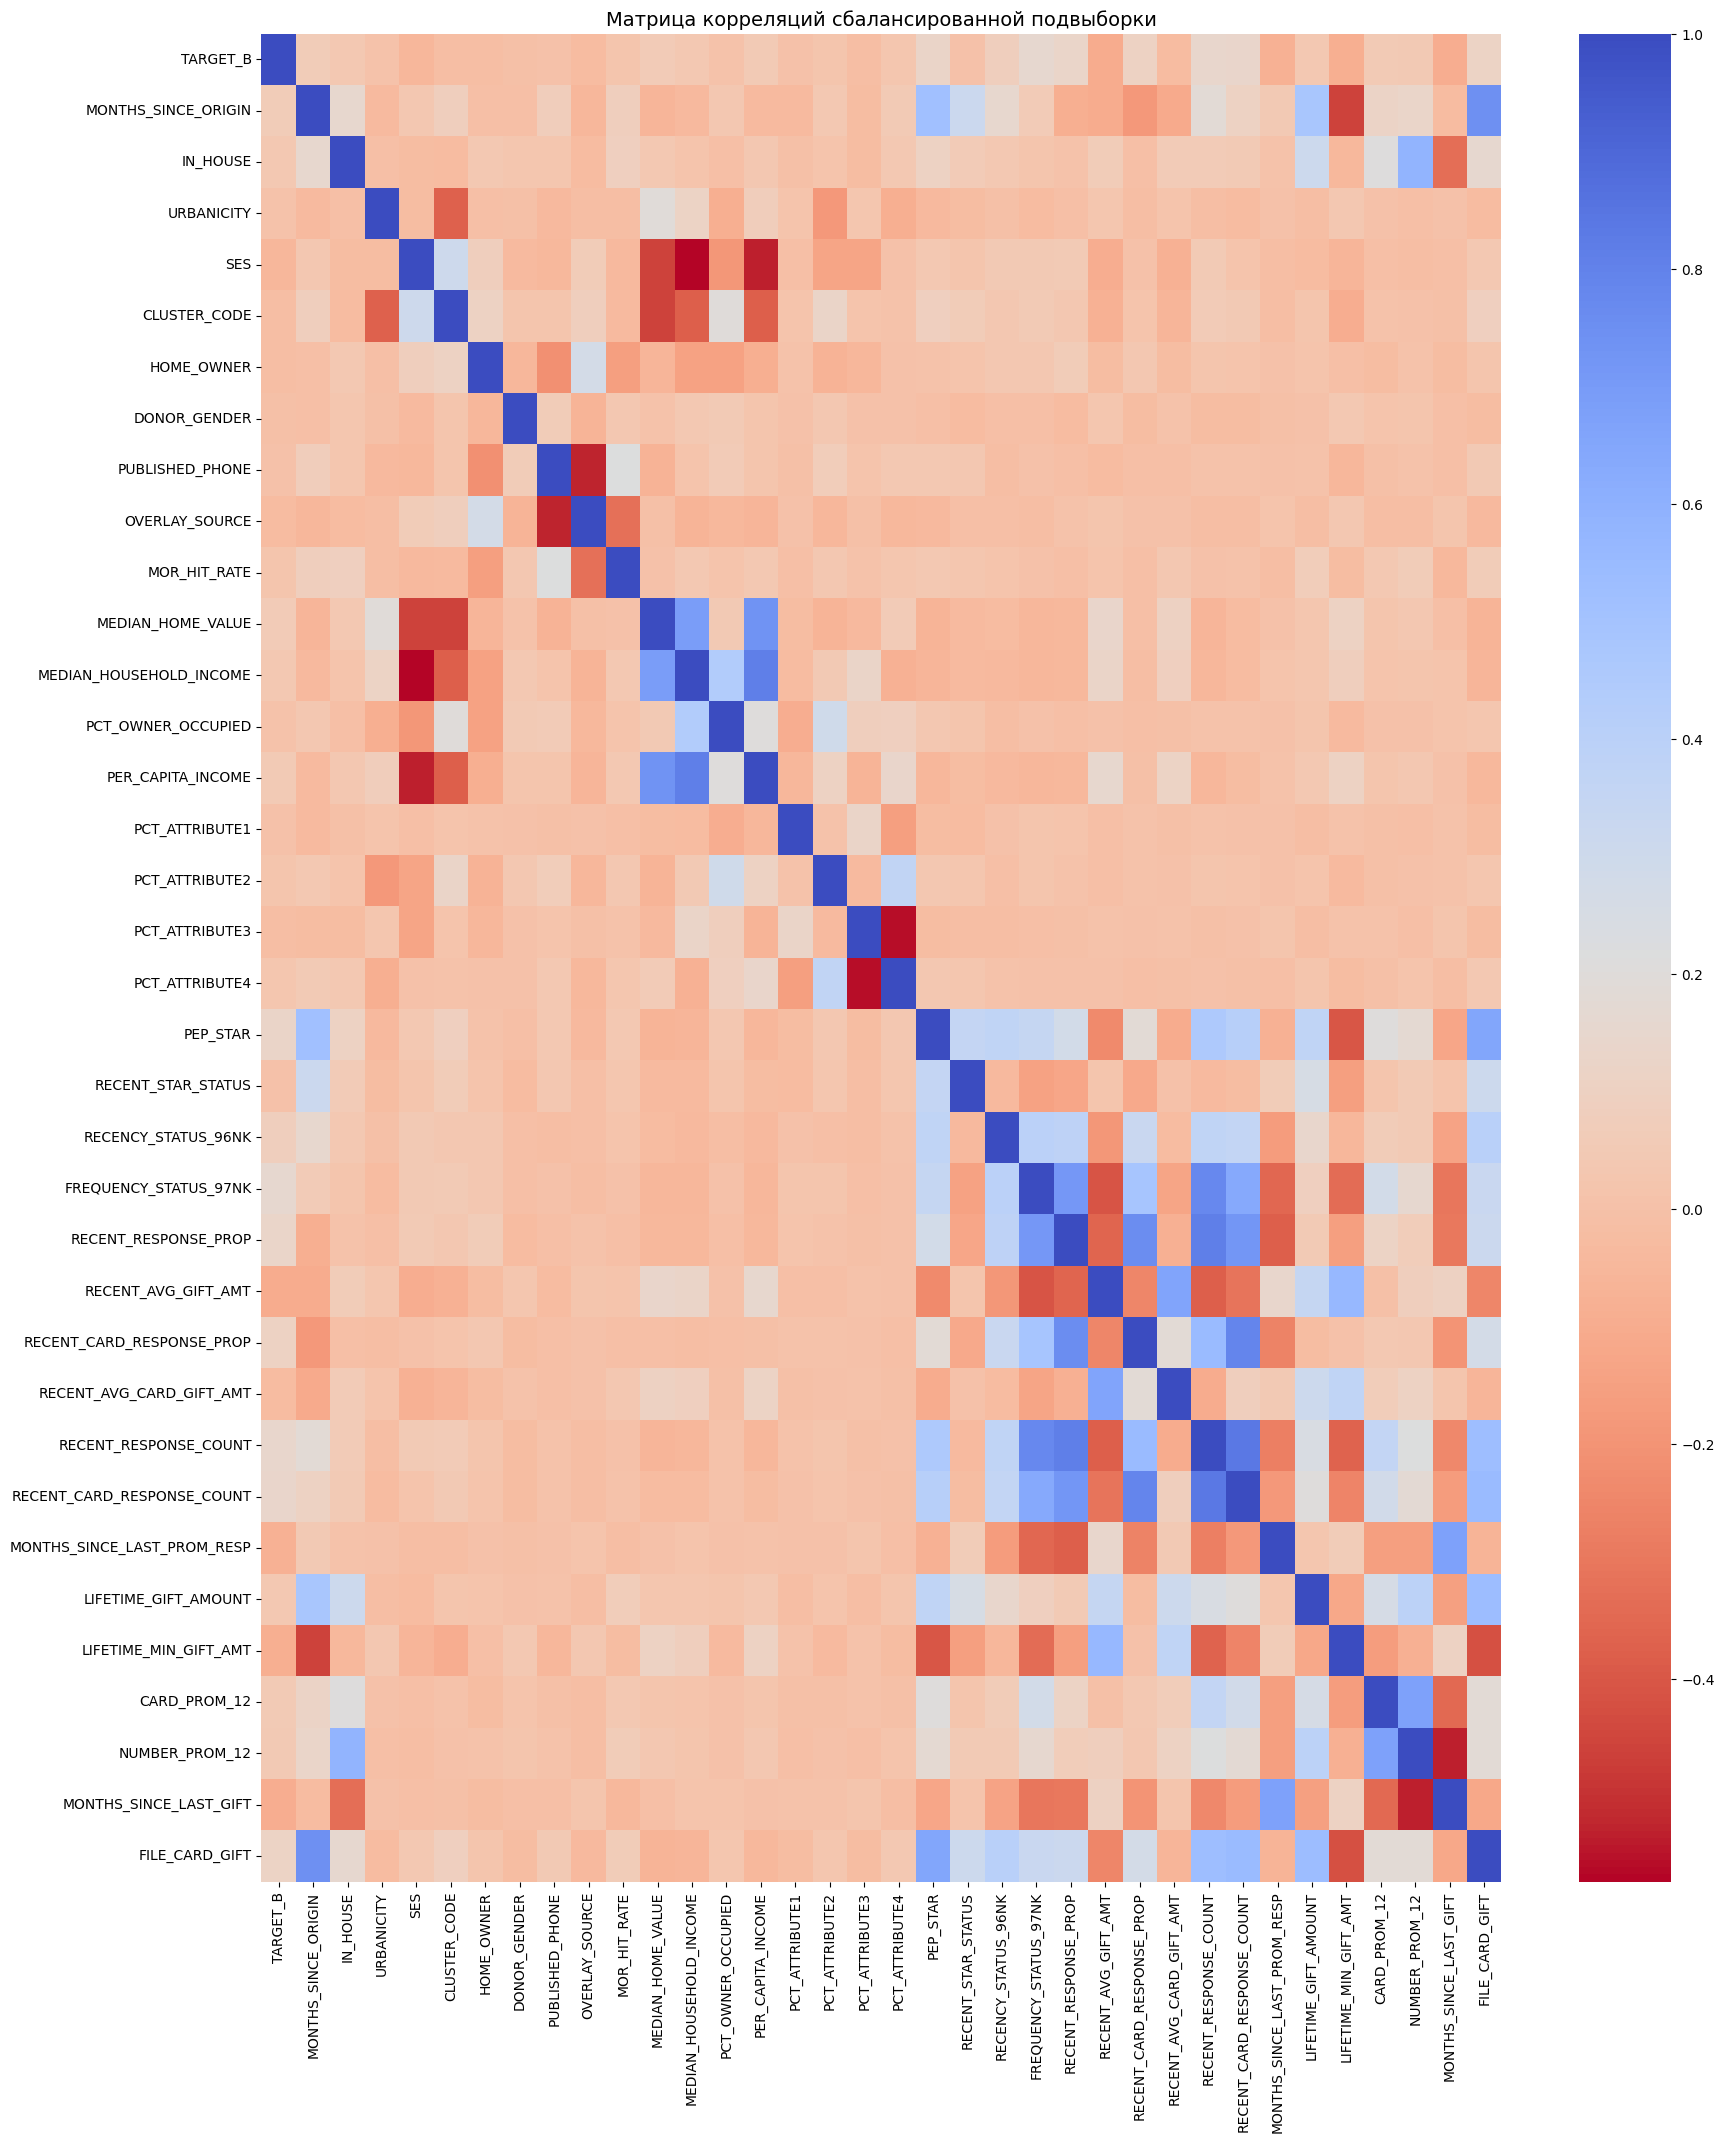

In [34]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws ={'size':20}, ax=ax)
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)
plt.show()

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('TARGET_B', axis=1)
y = new_df['TARGET_B']

# T-SNE алгоритм
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE заняло {:.2} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA заняло {:.2} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD заняло {:.2} сек".format(t1 - t0))

T-SNE заняло 1.4e+02 сек
PCA заняло 0.022 сек
Truncated SVD заняло 0.033 сек


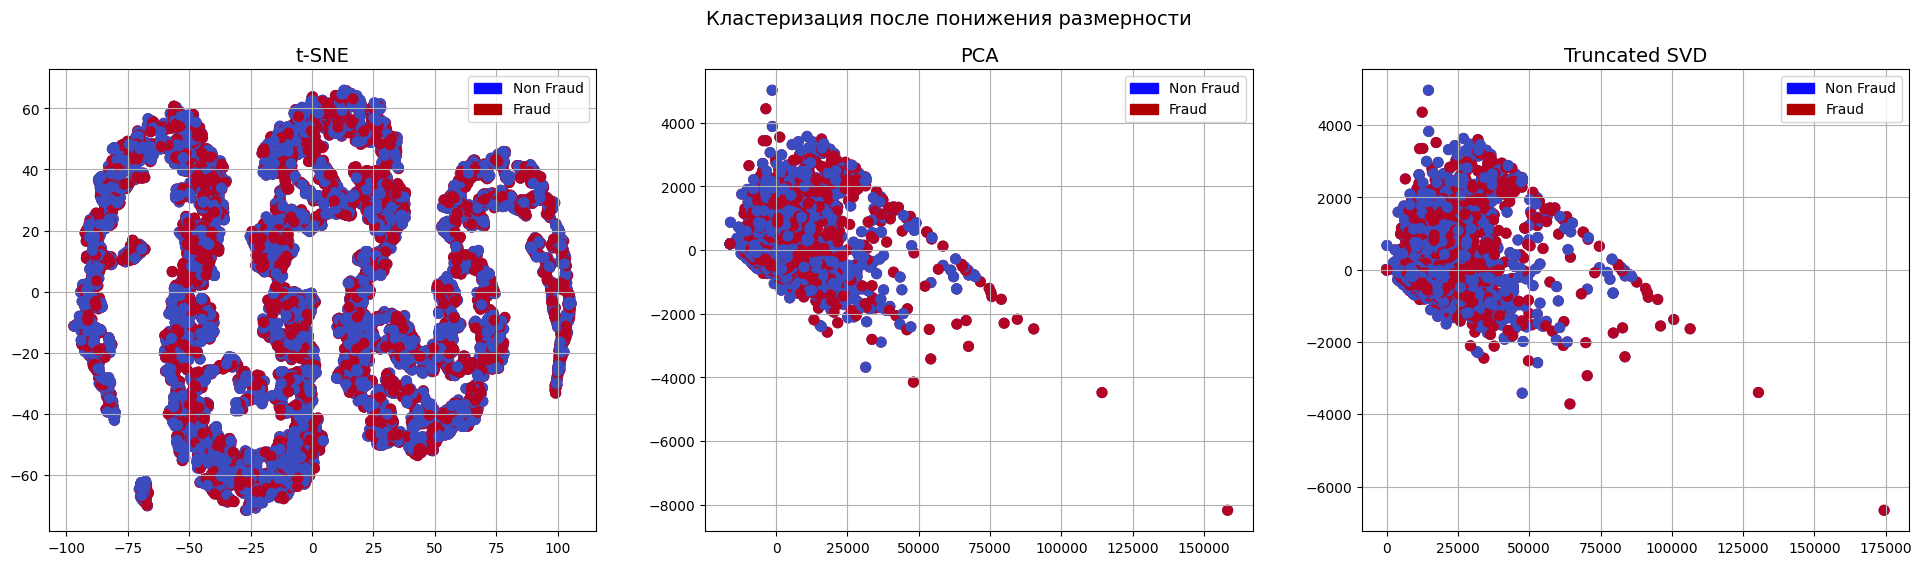

In [36]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [37]:
X = new_df.drop('TARGET_B', axis=1)
y = new_df['TARGET_B']

from sklearn.model_selection import train_test_split

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

In [41]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X, columns=X_train.columns, index=X_train.index)

In [40]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X, columns=X_test.columns, index=X_test.index)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": SVC(),
    "Support Vector Classifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [43]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 59.0 % accuracy score
Модель  SVC получила на обучающей выборке 57.99999999999999 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 55.00000000000001 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 53.0 % accuracy score


In [44]:
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_scaled, y_train)

log_reg = grid_log_reg.best_estimator_

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2, 7, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_scaled, y_train)

knears_neighbors = grid_knears.best_estimator_

In [45]:
# Метод опорных векторов
x = [1.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train_scaled, y_train)

svc = grid_svc.best_estimator_

In [46]:
# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_scaled, y_train)

tree_clf = grid_tree.best_estimator_

In [47]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  58.3%
Knears Neighbors Cross Validation Score 51.92%
Support Vector Classifier Cross Validation Score 53.48%
DecisionTree Classifier Cross Validation Score 57.29%


**Nearmiss**

In [48]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

In [50]:
undersample_X = df.drop('TARGET_B', axis=1)
undersample_y = df['TARGET_B']
undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)

In [51]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(undersample_Xtrain)
X_train_scaled_undersample = pd.DataFrame(X, columns=undersample_Xtrain.columns, index=undersample_Xtrain.index)

In [52]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(undersample_Xtest)
X_test_scaled_undersample = pd.DataFrame(X, columns=undersample_Xtest.columns, index=undersample_Xtest.index)

In [53]:
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({np.int64(0): 4416, np.int64(1): 4416})


In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [55]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)#
    train_scores_mean = np.mean(train_scores, axis=1)#
    train_scores_std = np.std(train_scores, axis=1)#
    test_scores_mean = np.mean(test_scores, axis=1)#
    test_scores_std = np.std(test_scores, axis=1)#
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")


    # Четвертая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

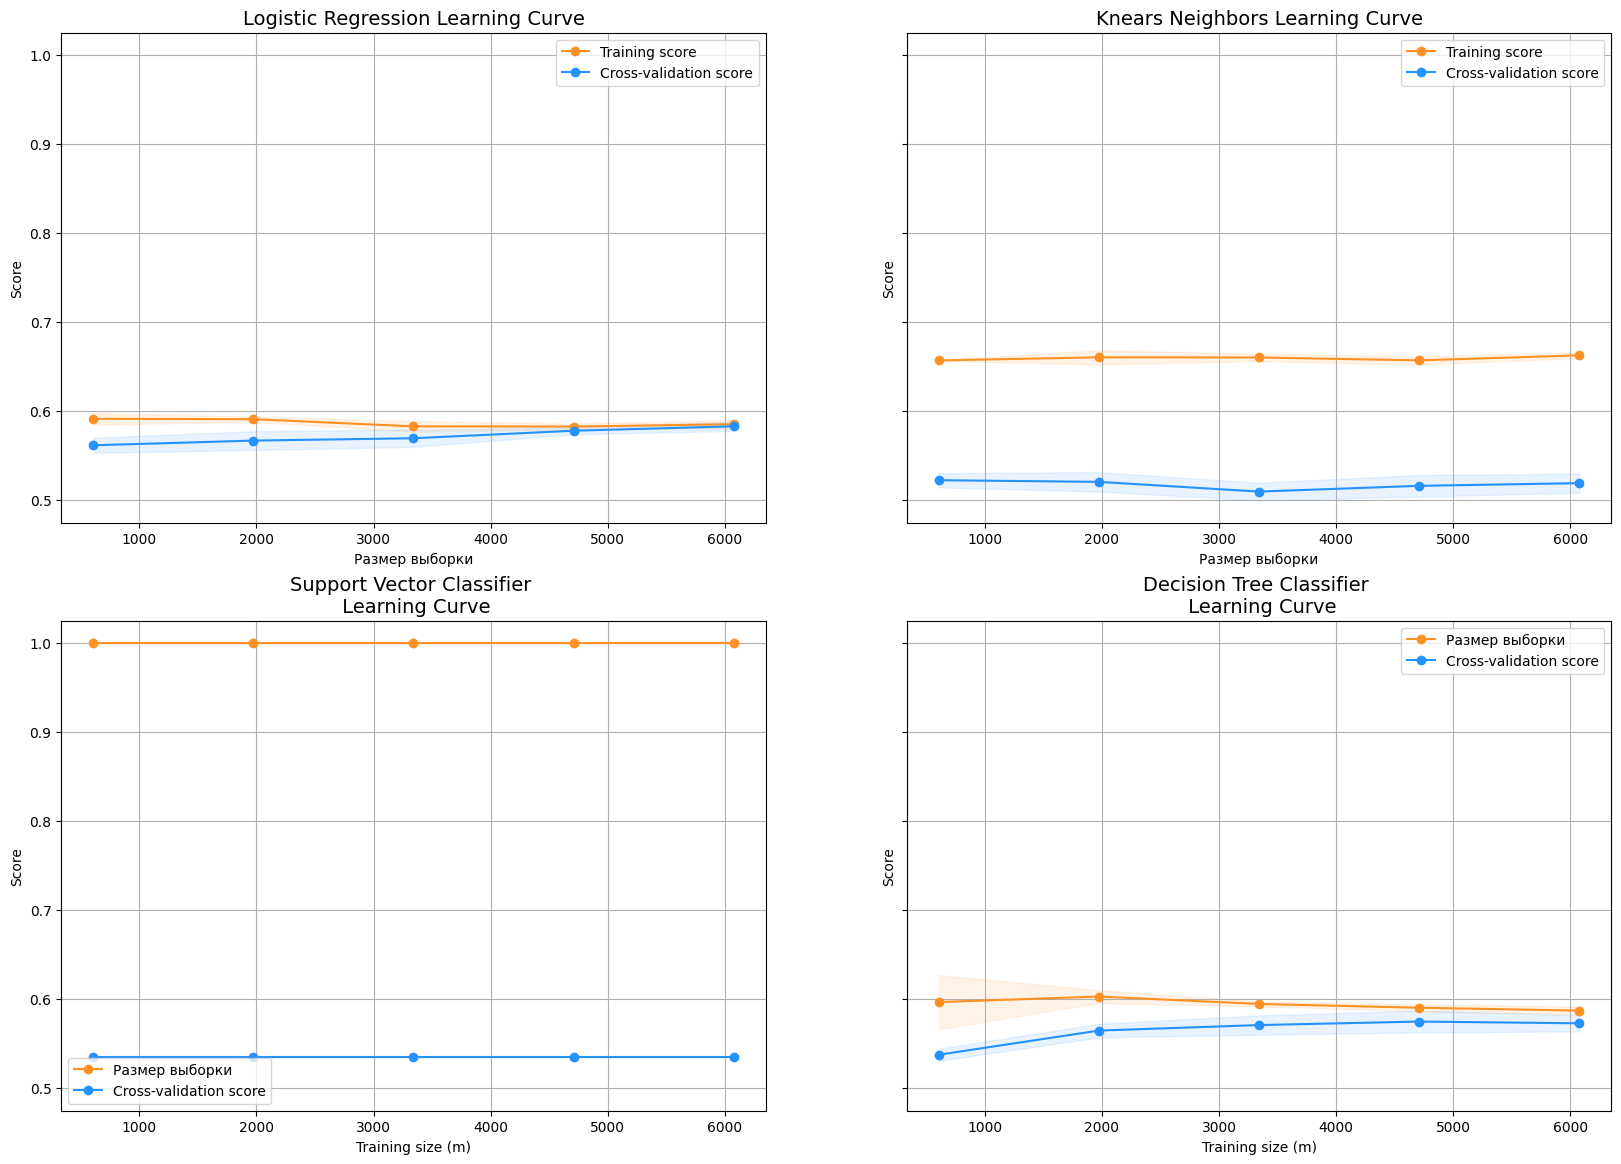

In [56]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train)

In [57]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [58]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.5970344600665345
KNears Neighbors:  0.5042619541460602
Support Vector Classifier:  0.4994952632720988
Decision Tree Classifier:  0.5612107298659623


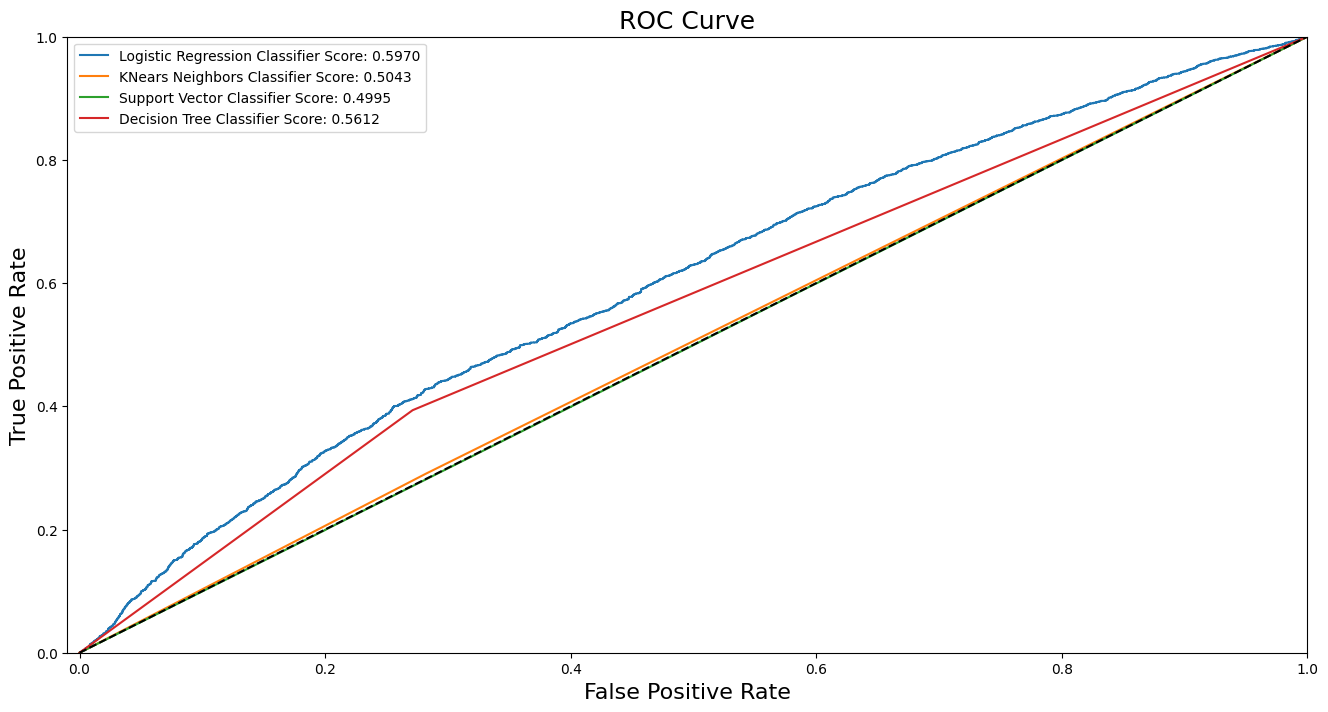

In [59]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

**Oversampling**


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X = df.drop('TARGET_B', axis=1)
y = df['TARGET_B']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)

In [61]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(original_Xtrain)
original_Xtrain_scaled = pd.DataFrame(X, columns=original_Xtrain.columns, index=original_Xtrain.index)

,MONTHS_SINCE_ORIGIN,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,...,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,FILE_CARD_GIFT
16633,-0.142857,0.0,-1.0,-1.0,-0.16,0.0,0.0,-1.0,-0.333333,3.000000,...,-0.945455,-1.0,-1.0,-0.75,-0.258427,0.714286,-3.0,-1.0,-0.75,-0.500000
2639,0.714286,0.0,-1.0,-1.0,-0.16,0.0,0.0,0.0,-0.333333,4.666667,...,0.327273,2.0,2.0,-0.75,1.426966,-0.571429,0.0,1.5,-0.75,0.666667
17228,-0.142857,0.0,0.5,-1.0,0.28,0.0,0.0,0.0,-0.333333,0.333333,...,0.645455,0.0,1.0,0.00,-0.112360,0.714286,0.0,0.5,0.00,-0.166667
13434,-0.571429,0.0,0.0,-1.0,-0.68,1.0,0.0,0.0,-0.333333,0.000000,...,0.418182,-1.0,0.0,0.75,-0.707865,1.428571,-3.0,-2.0,0.75,-0.500000
1097,0.428571,1.0,1.0,2.0,-0.72,1.0,0.0,-1.0,0.666667,0.000000,...,-0.472727,1.5,4.0,1.50,0.685393,-0.285714,-1.0,5.5,0.50,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,0.000000,0.0,-0.5,0.0,0.72,1.0,1.0,0.0,-0.333333,2.000000,...,0.781818,0.5,0.0,0.00,1.146067,0.714286,0.0,1.5,0.00,-0.166667
17944,0.857143,0.0,0.0,0.0,-0.44,0.0,1.0,0.0,-0.333333,1.666667,...,-0.218182,1.0,0.0,-0.75,0.551124,-0.642857,-1.0,0.0,-0.75,2.166667
17861,0.142857,0.0,-1.0,-1.0,-0.20,1.0,0.0,0.0,-0.333333,2.333333,...,0.145455,1.0,3.0,0.75,0.404494,0.142857,0.0,0.5,0.25,0.333333
2239,0.285714,0.0,0.5,0.0,0.32,1.0,1.0,-1.0,-0.333333,0.333333,...,0.418182,-0.5,0.0,-0.75,0.651685,0.000000,-1.0,0.5,-0.75,0.333333


In [62]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(original_Xtest)
original_Xtest_scaled = pd.DataFrame(X, columns=original_Xtest.columns, index=original_Xtest.index)

In [63]:
original_Xtrain_scaled = original_Xtrain.values
original_Xtest_scaled = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.75232854 0.24767146]
Тестовый набор: [0.74435666 0.25564334]


In [64]:
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 58.3%
Knears Neighbors Cross Validation Score: 51.92%
Support Vector Classifier Cross Validation Score: 53.48%
DecisionTreeClassifier Cross Validation Score: 57.29%


In [65]:
print(y.value_counts()[0])
print(y.value_counts()[1])

13300
4416


In [66]:
((y_train==1).sum())/((y_train==0).sum())

np.float64(0.8697685869030034)

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X = df.drop('TARGET_B', axis=1)
y = df['TARGET_B']



sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

over = SMOTE(sampling_strategy=0.5)

under = RandomUnderSampler(sampling_strategy=1)

for key, classifier in classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o', over), ('u', under), ('model', classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline, X, y, cv=sss, error_score='raise')

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 56.94 % accuracy score
Classifiers: KNearest Has a training score of, 53.7 % accuracy score
Classifiers: Support Vector Classifier Has a training score of, 51.36 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 54.94 % accuracy score


In [68]:
from sklearn.model_selection import GridSearchCV
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.4)),
        ('Random',RandomUnderSampler(sampling_strategy=0.9)),
        ('classification', LogisticRegression())
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model, {'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=7, sampling_strategy=0.4)),
                ('Random', RandomUnderSampler(sampling_strategy=0.9)),
                ('classification', LogisticRegression())])
0.6408663258816164
{'sampling__k_neighbors': 7}
Logistic Regression Cross Validation Score: 62.83%


In [69]:
from sklearn.metrics import classification_report

labels = ['Not donor', 'Donor']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

   Not donor       0.78      0.71      0.75      2660
       Donor       0.32      0.41      0.36       883

    accuracy                           0.64      3543
   macro avg       0.55      0.56      0.55      3543
weighted avg       0.67      0.64      0.65      3543



In [70]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [72]:
t0 = time.time()
log_reg_sm = LogisticRegression()
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 4.419230222702026 сек


In [73]:
log_reg_model = LogisticRegression()
log_reg_fitted = log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_fitted.predict(X_test_scaled)

knear_model = KNeighborsClassifier()
knear_fitted = knear_model.fit(X_train_scaled, y_train)
y_pred_knear_fitted = knear_fitted.predict(X_test_scaled)

svc_model = SVC()
svc_fitted = svc_model.fit(X_train_scaled, y_train)
y_pred_svc_fitted = svc_fitted.predict(X_test_scaled)

tree_model = DecisionTreeClassifier()
tree_fitted = tree_model.fit(X_train_scaled, y_train)
y_pred_tree_fitted = tree_fitted.predict(X_test_scaled)

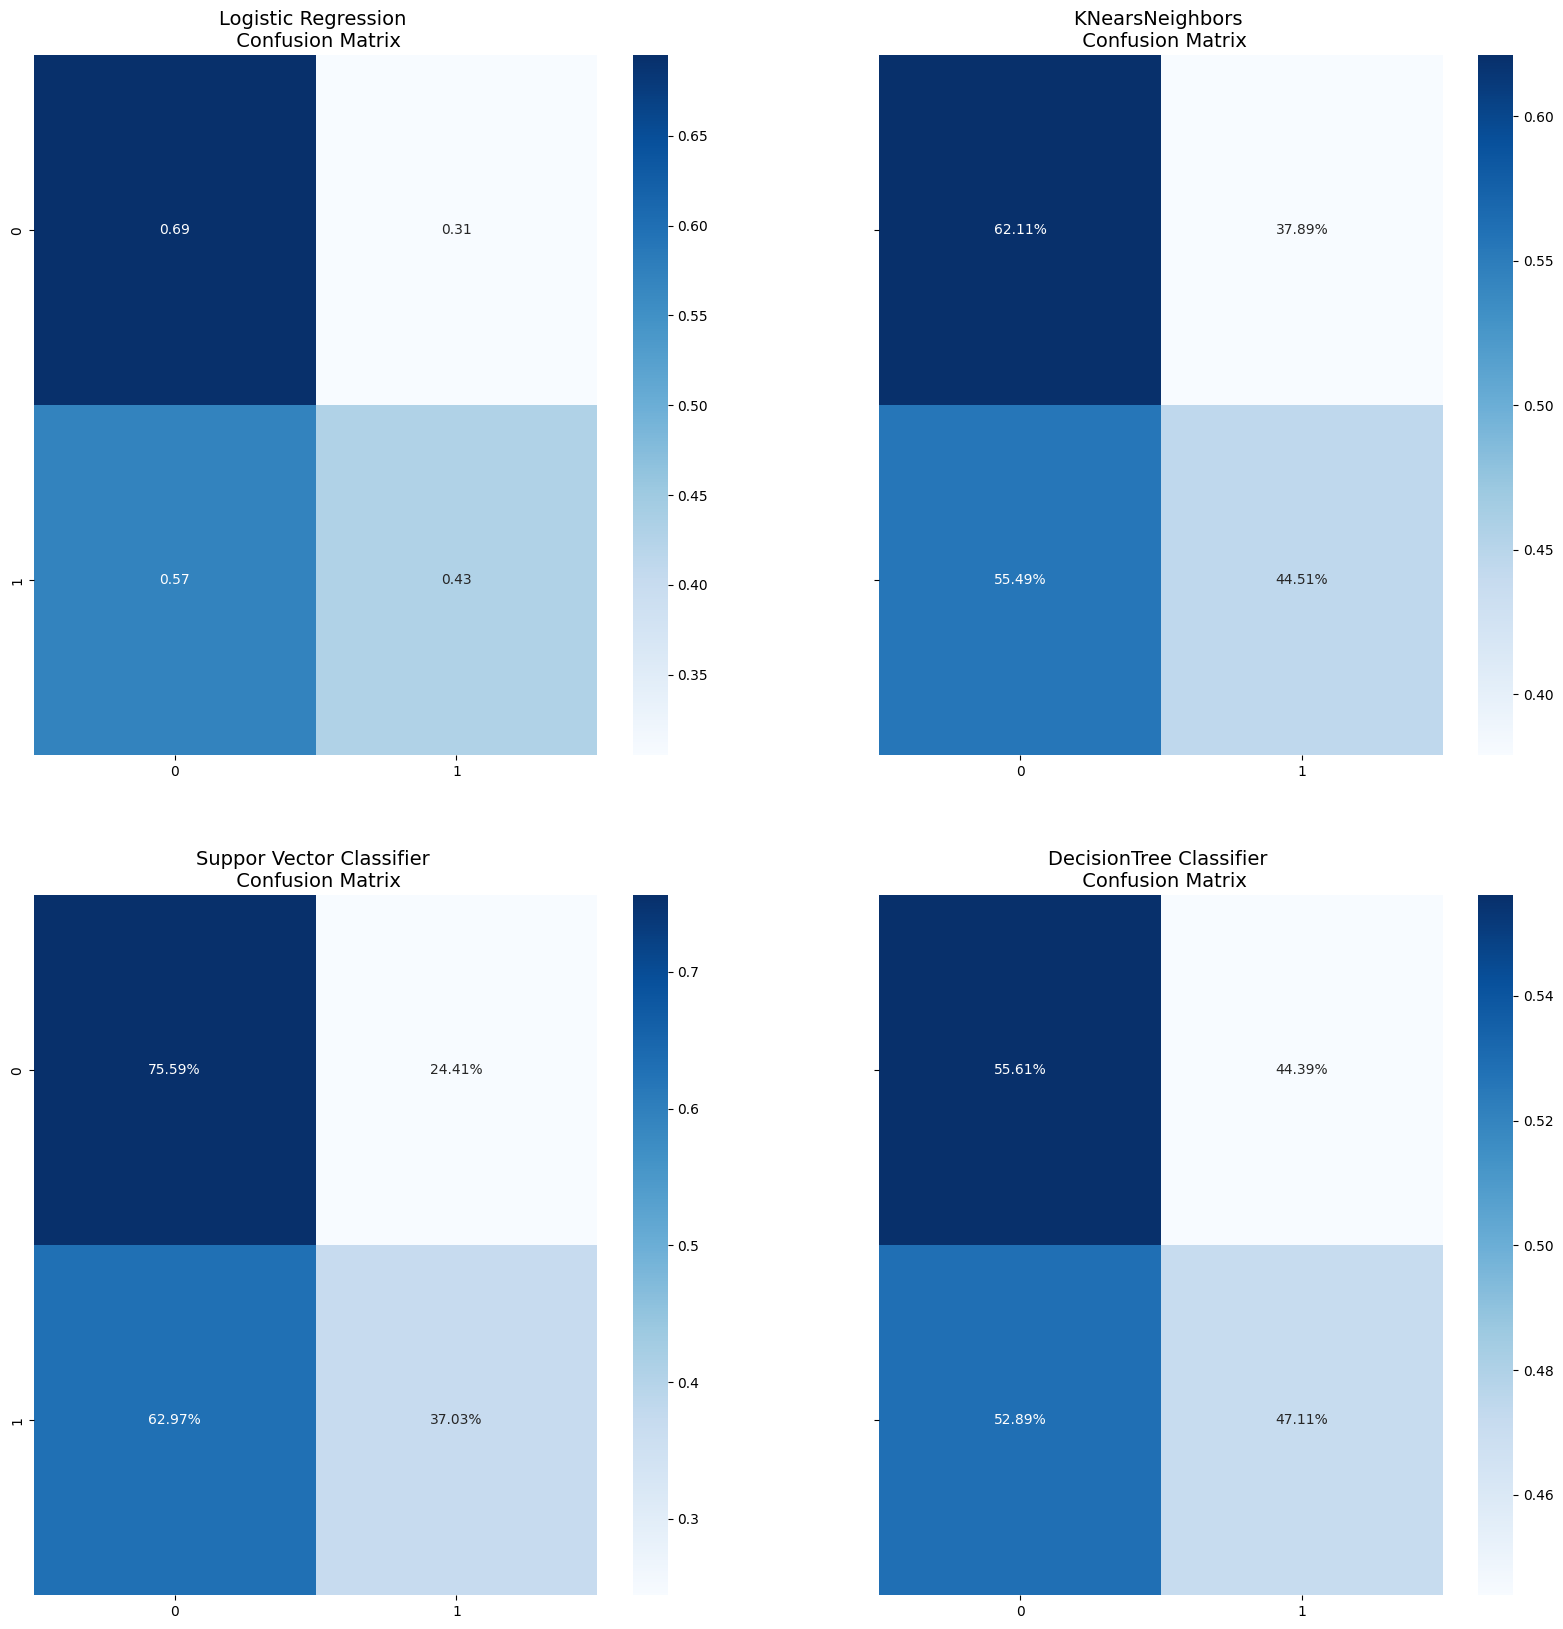

In [74]:
from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear_fitted, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc_fitted, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree_fitted, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

In [75]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=  knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

   Not donor       0.78      0.71      0.75      2660
       Donor       0.32      0.41      0.36       883

    accuracy                           0.64      3543
   macro avg       0.55      0.56      0.55      3543
weighted avg       0.67      0.64      0.65      3543

KNears Neighbors:
              precision    recall  f1-score   support

   Not donor       0.75      0.01      0.01      2660
       Donor       0.25      0.99      0.40       883

    accuracy                           0.25      3543
   macro avg       0.50      0.50      0.21      3543
weighted avg       0.63      0.25      0.11      3543

Support Vector Classifier:
              precision    recall  f1-score   support

   Not donor       0.75      1.00      0.86      2660
       Donor       0.00      0.00      0.00       883

    accuracy                           0.75      3543
   macro avg       0.38      0.50      0.43      3543
weighted

In [76]:
# Логистическая регрессия с under-sampling
y_pred = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.504375
1,Oversampling (SMOTE),0.636466
